In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('student_habits_performance_changed.csv')

In [3]:
def prediction(x):
    return w*x + b 

In [4]:
def loss_function(w, b):
    cost = 0
    for index, row in df.iterrows():
        cost += ((w * row['study_hours_per_day'] + b - row['exam_score']) ** 2)
    cost /= (2*df.shape[0])
    return cost

In [5]:
def gradient_descent(w, b, alpha):
    w_d = 0
    for index, row in df.iterrows():
        xi = row['study_hours_per_day']
        w_d += xi * (w * xi + b - row['exam_score'])
    w_d /= df.shape[0]
    
    b_d = 0
    for index, row in df.iterrows():
        xi = row['study_hours_per_day']
        b_d += (w*xi + b - row['exam_score'])
    b_d /= df.shape[0]

    new_w = w - alpha * w_d
    new_b = b - alpha * b_d
    return new_w, new_b

In [6]:
def gradient_descent_fast(w, b, alpha, X, y):
    n = len(X)
    y_pred = w * X + b
    error = y_pred - y
    
    w_d = (1/n) * np.dot(X, error)
    b_d = (1/n) * np.sum(error)

    new_w = w - alpha * w_d
    new_b = b - alpha * b_d

    return new_w, new_b

In [7]:
w_values = np.linspace(-500, 500, 20)
b_values = np.linspace(-500, 1000, 20)
W, B = np.meshgrid(w_values, b_values)

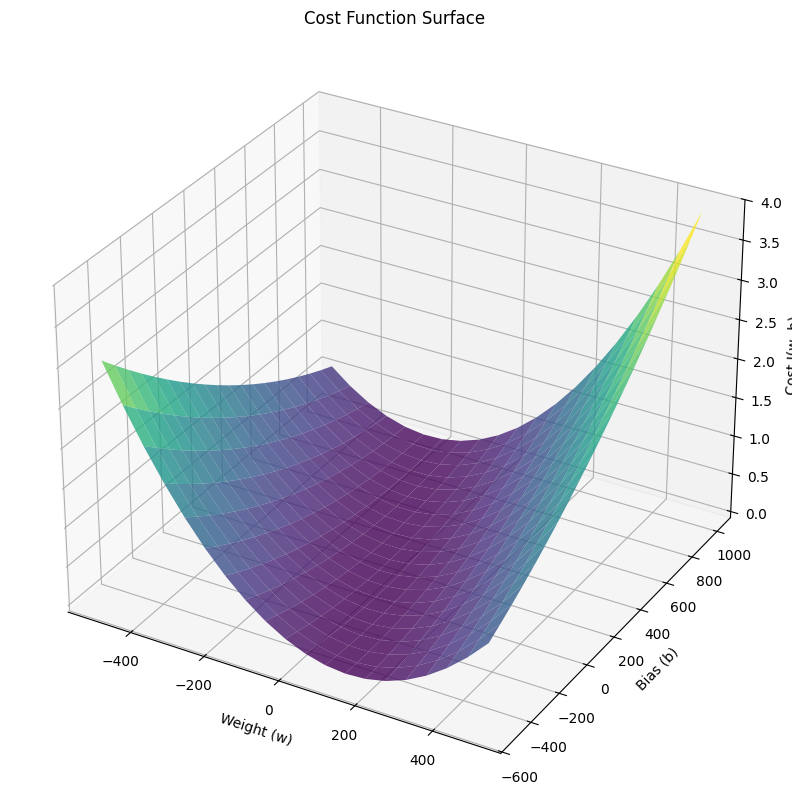

In [7]:
Z = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = loss_function(W[i, j], B[i, j])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(W, B, Z, cmap="viridis", alpha=0.8)

ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Cost J(w, b)")
ax.set_title("Cost Function Surface")

plt.show()

In [10]:
no_steps = 1000
X = df['study_hours_per_day'].values
y = df['exam_score'].values
w, w_old = 0, 1
b, b_old = 0, 1
eps = 0.01
alpha = 0.1

In [12]:
for step in range(no_steps):
    w_old, b_old = w, b
    w, b = gradient_descent_fast(w, b, alpha, X, y)
    if abs(w - w_old) < eps and abs(b - b_old) < eps:
        break
print('final result')
print(w, b)

final result
9.661391334767531 35.20533670395945
